In [1]:
#Import libraries
import numpy as np
import pandas as pd
import math
import time
import matplotlib.pyplot as plt
import random
import secrets
random.seed(48)

#Demand arrival model

In [2]:
#Generate customer arrival sequence
#Python random function produces uniformly distributed values. Adversarial sequences cannot be generated

def DemandArrival(n, p, a):

  s = round(n * p) #create a number of stochastically distributed customers
  Rewards = list([0, a, 1]) #list of rewards got from each customer

  #Create a uniformly distributed (stochastic) group of customers
  Vs = np.random.choice(Rewards, size = s, replace = True).tolist()
  random.shuffle(Vs) #randomly shuffle stochastic customers

  #Create an adversarial group of customers
  Va = list()
  for i in range(n-s):
    Va.append(float(secrets.choice(Rewards)))

  V = Vs + Va
  V = random.sample(V, len(V)) #mix stochastic and adversarial customers randomly

  return V

#Non-adaptive algorithm




##Functions of the non-adaptive algorithm

In [3]:
#Function of non-adaptive algorithm with printing each step

def NonAdaptivePrint(n, b, a, p):

  #generate a sequence of customers
  V = DemandArrival(n, p, a)
  print(V)

  q_1, q_2e, q_2f = 0, 0, 0 #set counters for accepting customers

  for i in range(n):
    print(i+1, '/', n) #print lambda

    #Acception conditions
    if V[i] == 1:
      q_1 += 1
      b -= 1
      print('Customer 1 accepted')
      print('b =', b)
    elif (V[i] == a) and ((q_1 + q_2e) < math.floor(p*b*(i+1)/n)):
      q_2e += 1
      b -= 1
      print('Customer 2e accepted')
      print(b)
    elif (V[i] == a) and (q_2f < math.floor((1-p)/(2-a)*b)):
      q_2f += 1
      b -= 1
      print('Customer 2f accepted')
      print('b =', b)
    else:
      print('Customer skipped')
      print('b =', b)

    if b == 0: #if no units left
      break

  return q_1 * 1 + (q_2e + q_2f) * a

In [4]:
#Function of a non-adaptive algorithm for algorithms comparison

def NonAdaptive(n, b, a, p, V):

  start_time = time.time() #computational time calculation

  q_1, q_2e, q_2f = 0, 0, 0 #set counters for accepting customers

  #Acception conditions

  for i in range(n):
    if V[i] == 1:
      q_1 += 1
      b -= 1
    elif (V[i] == a) and ((q_1 + q_2e) < math.floor(p*b*(i+1)/n)):
      q_2e += 1
      b -= 1
    elif (V[i] == a) and (q_2f < math.floor((1-p)/(2-a)*b)):
      q_2f += 1
      b -= 1

    if b == 0: #if no units left
      break

  end_time = time.time()

  return 'non-adaptive', q_1, q_2e + q_2f, q_1 * 1 + (q_2e + q_2f) * a, b, end_time - start_time, n #return name, q_1, q_2, reward, b, time, n

##Detailed numerical example

In [5]:
#Detailed algorithm

print('Reward: ', NonAdaptivePrint(n = 25, b = 10, a = 0.8, p = 0.6))

[1.0, 0.8, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.8, 1.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.8, 0.8, 0.8, 0.8]
1 / 25
Customer 1 accepted
b = 9
2 / 25
Customer 2f accepted
b = 8
3 / 25
Customer 1 accepted
b = 7
4 / 25
Customer skipped
b = 7
5 / 25
Customer 1 accepted
b = 6
6 / 25
Customer 1 accepted
b = 5
7 / 25
Customer skipped
b = 5
8 / 25
Customer skipped
b = 5
9 / 25
Customer 1 accepted
b = 4
10 / 25
Customer 1 accepted
b = 3
11 / 25
Customer skipped
b = 3
12 / 25
Customer skipped
b = 3
13 / 25
Customer 1 accepted
b = 2
14 / 25
Customer 1 accepted
b = 1
15 / 25
Customer skipped
b = 1
16 / 25
Customer 1 accepted
b = 0
Reward:  9.8


In [6]:
#return name, customers type-1 accepted, customers type-2 accepted, reward, units left, time, number of periods
V1 = DemandArrival(n = 25, a = 0.5, p = 0.6)
NonAdaptive(n = 25, b = 10, a = 0.5, p = 0.6, V = V1)

('non-adaptive', 9, 1, 9.5, 0, 1.430511474609375e-05, 25)

#Adaptive algorithm

##Functions of the adaptive algorithm

In [13]:
#Function of the adaptive algorithm with printing each step

def AdaptivePrint(c, a, b, n, p):

  #Generate a sequence of customers
  V = DemandArrival(n, p, a)
  print(V)

  q_1, q_2, o_1, o_2 = 0, 0, 0, 0 #set counters for accepting customers and number of customers arrived up to time lamdba
  phi = (1-c)/(1-a) #define constants
  delta = phi*b/n

  for i in range(n):

    print(i+1, '/', n) #print lambda
    lambd = (i+1)/n #define lambda

    #Define functions u_1 and u_12 for computing boundaries
    if lambd < delta: #if not enough data observed
      u_1 = b
      u_12 = b
    else:
      u_1 = min(o_1/(lambd*p), (o_1+(1-lambd)*(1-p)*n)/(1-p+lambd*p))
      u_12 = min((o_1+o_2)/(lambd*p), (o_1+o_2+(1-lambd)*(1-p)*n)/(1-p+lambd*p))

    #Acception conditions
    if V[i] == 1:
      q_1 += 1
      b -= 1
      print('Customer 1 accepted')
      print('b =', b)
    elif (V[i] == a) and (u_12 < b):
      q_2 += 1
      b -= 1
      print('Customer 2.1 accepted')
      print('b =', b)
    elif (V[i] == a) and (q_2 <= math.floor(phi*b + c*max(0, b-u_1))):
      q_2 += 1
      b -= 1
      print('Customer 2.2 accepted')
      print('b =', b)
    else:
      print('Customer skipped')

    #Count the number of customers arrived up to time lamdba
    if (V[i] == 1):
      o_1 += 1
    elif (V[i] == a):
      o_2 += 1

    if b == 0: #if no units left
      break

  return q_1*1 + q_2*a


In [12]:
#Function of the adaptive algorithm for algorithms comparison

def Adaptive(c, a, b, n, p, V):

  start_time = time.time() #computational time calculation

  q_1, q_2, o_1, o_2 = 0, 0, 0, 0 #set counters for accepting customers and number of customers arrived up to time lamdba
  phi = (1-c)/(1-a) #define constants
  delta = phi*b/n

  for i in range(n):

    lambd = (i+1)/n #define lambda

    #Define functions u_1 and u_12 for computing boundaries
    if lambd < delta: #if not enough data observed
      u_1 = b
      u_12 = b
    else:
      u_1 = min(o_1/(lambd*p), (o_1+(1-lambd)*(1-p)*n)/(1-p+lambd*p))
      u_12 = min((o_1+o_2)/(lambd*p), (o_1+o_2+(1-lambd)*(1-p)*n)/(1-p+lambd*p))

    #Acception conditions
    if V[i] == 1:
      q_1 += 1
      b -= 1
    elif (V[i] == a) and (u_12 < b):
      q_2 += 1
      b -= 1
    elif (V[i] == a) and (q_2 <= math.floor(phi*b + c*max(0, b-u_1))):
      q_2 += 1
      b -= 1

    #Count the number of customers arrived up to time lamdba
    if (V[i] == 1):
      o_1 += 1
    elif (V[i] == a):
      o_2 += 1

    if b == 0: #if no units left
      break

  end_time = time.time()

  return 'adaptive', q_1, q_2, q_1*1 + q_2* a, b, end_time - start_time, n #return name, q_1, q_2, reward, b, time, n

##Detailed numerical example

In [46]:
#Detailed algorithm

print('Reward: ', AdaptivePrint(c = 0.5, a = 0.6, b = 4, n = 10, p = 0.5))

[0.6, 0.0, 1.0, 0.6, 1.0, 0.0, 0.6, 0.0, 0.0, 0.6]
1 / 10
Customer 2.2 accepted
b = 3
2 / 10
Customer skipped
3 / 10
Customer 1 accepted
b = 2
4 / 10
Customer 2.2 accepted
b = 1
5 / 10
Customer 1 accepted
b = 0
Reward:  3.2


In [10]:
#return name, q_1, q_2, reward, b, time, n
V2 = DemandArrival(n = 25, p = 0.6, a = 0.5)
Adaptive(c = 0.6, a = 0.5, b = 10, n = 25, p = 0.6, V = V2)

('adaptive', 7, 3, 8.5, 0, 3.337860107421875e-05, 25)

#Airplane example

In [ ]:
#300 seats available, 2500 periods of selling
#Business class customers bring the reward 1, economy 0.5
#60% of the demand can be predicted
#Competitive ratio parameter is 0.5

n_air = 650
b_air = 300
a_air = 0.5
p_air = 0.6
c_air = 0.5
V_air = DemandArrival(n = n_air, a = a_air, p = p_air)

In [ ]:
#Non-adaptive
NonAdaptive(n = n_air, b = b_air, a = a_air, p = p_air, V = V_air)
#name, customers type 1 accepted, customers type 2 accepted, reward, units left, time, n

('non-adaptive', 221, 53, 247.5, 26, 0.0004172325134277344, 650)

In [ ]:
#Adaptive
Adaptive(n = n_air, b = b_air, a = a_air, p = p_air, V = V_air, c = c_air)
#name, customers type 1 accepted, customers type 2 accepted, reward, units left, time, n

('adaptive', 196, 104, 248.0, 0, 0.008337974548339844, 650)

#Comparison

In [47]:
#Simulation with smaller n and different parameters

#Parameters to change
n2 = 25 #number of customers
k2 = 300 #number of iterations

a2 = 0.5 #reward from customer type-2
d2 = 0.5 #share of units b in the number of customers n
p2 = 0.5 #share of stochastically distributed customers
c2 = 0.5 #competitive ratio parameter for the adaptive algorithm

#Creating empty dataframes for saving simulation data
df_non_adaptive = pd.DataFrame(index = range(0, k2), columns=['Algorithm name','q_1','q_2','Reward', 'Units left','Time', 'n'])
df_adaptive = pd.DataFrame(index = range(0, k2), columns=['Algorithm name','q_1','q_2','Reward', 'Units left','Time', 'n'])

for i in range(k2):
  V3 = DemandArrival(n = n2, p = p2, a = a2) #Generate a customer sequence
  df_non_adaptive.iloc[i] = pd.DataFrame(list(NonAdaptive(a = a2, b = round(d2 * n2), n = n2, p = p2, V = V3))).T #estimate non-adaptive algorithm
  df_adaptive.iloc[i] = pd.DataFrame(list(Adaptive(a = a2, b = round(d2 * n2), n = n2, p = p2, c = c2, V = V3))).T #estimate adaptive algorithm
  n2 += 25


Text(0.5, 1.0, 'Rewards comparison')

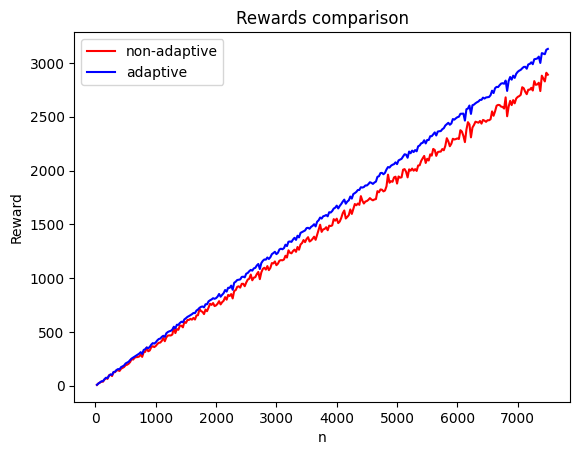

In [48]:
#Rewards comparison

plt.plot(df_adaptive['n'], df_non_adaptive['Reward'], color='r', label='non-adaptive')
plt.plot(df_adaptive['n'], df_adaptive['Reward'], color='b', label='adaptive')
plt.legend(loc="upper left")
plt.xlabel("n")
plt.ylabel("Reward")
plt.title("Rewards comparison")

Text(0.5, 1.0, 'Performance comparison')

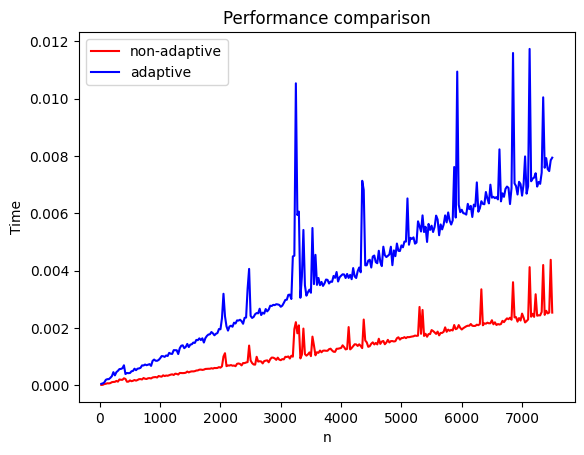

In [49]:
#Performance comparison

plt.plot(df_adaptive['n'], df_non_adaptive['Time'], color='r', label='non-adaptive')
plt.plot(df_adaptive['n'], df_adaptive['Time'], color='b', label='adaptive')
plt.legend(loc="upper left")
plt.xlabel("n")
plt.ylabel("Time")
plt.title("Performance comparison")

Text(0.5, 1.0, 'Units left comparison')

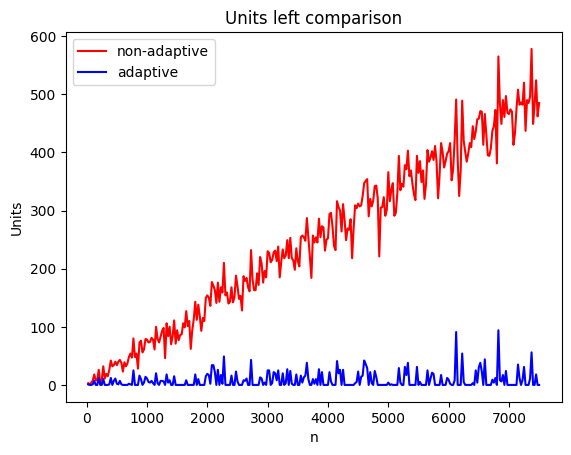

In [50]:
#Units left comparison

plt.plot(df_adaptive['n'], df_non_adaptive['Units left'], color='r', label='non-adaptive')
plt.plot(df_adaptive['n'], df_adaptive['Units left'], color='b', label='adaptive')
plt.legend(loc="upper left")
plt.xlabel("n")
plt.ylabel("Units")
plt.title("Units left comparison")

Text(0.5, 1.0, 'Customers type-1 comparison')

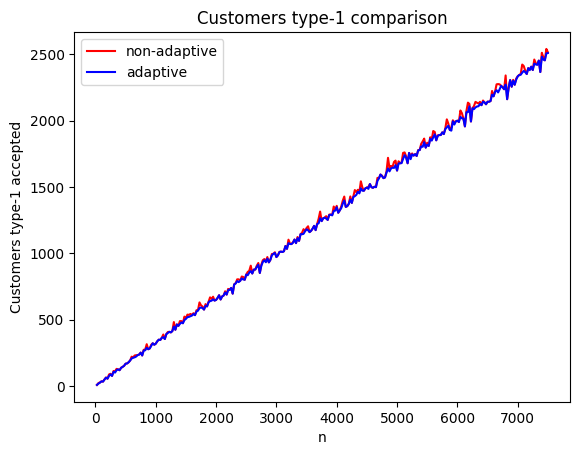

In [51]:
#Customers type-1 accepted comparison

plt.plot(df_adaptive['n'], df_non_adaptive['q_1'], color='r', label='non-adaptive')
plt.plot(df_adaptive['n'], df_adaptive['q_1'], color='b', label='adaptive')
plt.legend(loc="upper left")
plt.xlabel("n")
plt.ylabel("Customers type-1 accepted")
plt.title("Customers type-1 comparison")

Text(0.5, 1.0, 'Customers type-2 comparison')

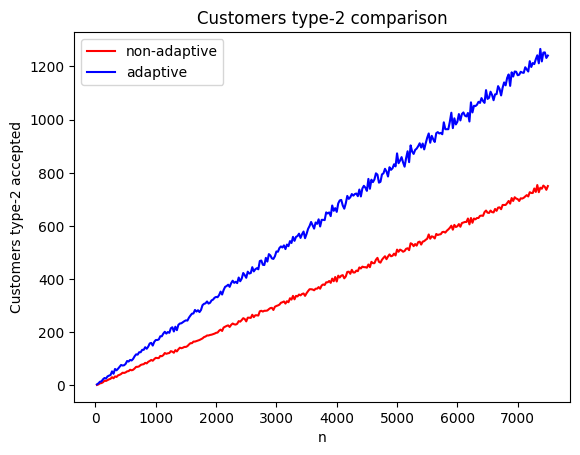

In [52]:
#Customers type-2 accepted comparison

plt.plot(df_adaptive['n'], df_non_adaptive['q_2'], color='r', label='non-adaptive')
plt.plot(df_adaptive['n'], df_adaptive['q_2'], color='b', label='adaptive')
plt.legend(loc="upper left")
plt.xlabel("n")
plt.ylabel("Customers type-2 accepted")
plt.title("Customers type-2 comparison")